In [ ]:
# Google Colaboratory를 사용할 때는 다음 주석을 해제하고 실행하기 바랍니다.

In [ ]:
# # 다음을 실행하면 authorization code 입력을 요청받습니다.
# # 출력된 링크를 클릭하고 Google 계정으로 로그인한 뒤,
# # authorization code를 복사해서 붙여 넣습니다.
# import os
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# working_dir = 'MLSys_100Knocks' #　※※ 여러분이 만든 폴더 경로가 다를 때는 다음을 변경합니다. ※※
# path = f'/content/drive/MyDrive/{working_dir}/MainChapter/chapter10'
# os.chdir(path)

In [ ]:
# Jupyter notebook ipywidgets 활성화
# for jupyter notebook (virtualenv 사용 시)
#!jupyter nbextension enable --user --py widgetsnbextension

# for jupyter lab
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

# 10장 머신러닝 시스템 대시보드를 만드는 테크닉 10

### 테크닉 91: 단일 데이터를 로딩하자

In [2]:
import os
import pandas as pd

data_dir = 'data'
store_monthly_dir = os.path.join(data_dir, '01_store_monthly')
ml_base_dir = os.path.join(data_dir, '02_ml_base')

output_ml_result_dir = os.path.join(data_dir, '10_output_ml_result')
output_report_dir = os.path.join(data_dir, '11_output_report')

store_monthly_file = 'store_monthly_data.csv'
ml_base_file = 'ml_base_data.csv'

store_monthly_data = pd.read_csv(
    os.path.join(store_monthly_dir, store_monthly_file))
ml_base_data = pd.read_csv(os.path.join(ml_base_dir, ml_base_file))
display(store_monthly_data.head(3))
display(ml_base_data.head(3))

,store_name,order,order_fin,order_cancel,order_delivery,order_takeout,order_weekday,order_weekend,order_time_11,order_time_12,...,order_time_14,order_time_15,order_time_16,order_time_17,order_time_18,order_time_19,order_time_20,order_time_21,delta_avg,year_month
0,가덕해안로점,1000,818,182,741,259,732,268,78,118,...,99,66,77,107,91,100,86,94,33.943765,202004
1,가마산로2점,1470,1207,263,1099,371,1076,394,181,141,...,112,123,146,132,143,118,121,125,34.702568,202004
2,가마산로점,1021,838,183,792,229,748,273,81,105,...,94,93,111,77,81,104,88,86,34.730310,202004


,store_name,y_weekday,y_weekend,order,order_fin,order_cancel,order_delivery,order_takeout,order_weekday,order_weekend,...,order_time_14,order_time_15,order_time_16,order_time_17,order_time_18,order_time_19,order_time_20,order_time_21,delta_avg,year_month
0,가덕해안로점,0.0,1.0,1000,818,182,741,259,732,268,...,99,66,77,107,91,100,86,94,33.943765,202004
1,가마산로2점,0.0,1.0,1470,1207,263,1099,371,1076,394,...,112,123,146,132,143,118,121,125,34.702568,202004
2,가마산로점,0.0,1.0,1021,838,183,792,229,748,273,...,94,93,111,77,81,104,88,86,34.730310,202004


### 테크닉 92: 업데이트 데이터를 로딩해 매장별 데이터를 만들자

In [3]:
ml_results_dirs = os.listdir(output_ml_result_dir)
score_all = []

for ml_results_dir in ml_results_dirs:
    score_file_path = os.path.join(
        output_ml_result_dir, ml_results_dir, 'score.csv')
    score_monthly = pd.read_csv(score_file_path)
    score_monthly['dirs'] = ml_results_dir
    score_all.append(score_monthly)

score_all = pd.concat(score_all, ignore_index=True)
score_all.head()

,DataCategory,acc,f1,recall,precision,tp,fn,fp,tn,model_name,model_target,dirs
0,train,1.000000,1.000000,1.000000,1.000000,747,0,0,874,tree,y_weekday,results_202104
1,test,0.625899,0.585987,0.571429,0.601307,184,138,122,251,tree,y_weekday,results_202104
2,train,1.000000,1.000000,1.000000,1.000000,747,0,0,874,RandomForest,y_weekday,results_202104
3,test,0.657554,0.600671,0.555901,0.653285,179,143,95,278,RandomForest,y_weekday,results_202104
4,train,0.793954,0.783679,0.809906,0.759097,605,142,192,682,GradientBoosting,y_weekday,results_202104


In [4]:
score_all.loc[:, 'year_month'] = score_all['dirs'].str.split('_', expand=True)[1]
score_all.head()

,DataCategory,acc,f1,recall,precision,tp,fn,fp,tn,model_name,model_target,dirs,year_month
0,train,1.000000,1.000000,1.000000,1.000000,747,0,0,874,tree,y_weekday,results_202104,202104
1,test,0.625899,0.585987,0.571429,0.601307,184,138,122,251,tree,y_weekday,results_202104,202104
2,train,1.000000,1.000000,1.000000,1.000000,747,0,0,874,RandomForest,y_weekday,results_202104,202104
3,test,0.657554,0.600671,0.555901,0.653285,179,143,95,278,RandomForest,y_weekday,results_202104,202104
4,train,0.793954,0.783679,0.809906,0.759097,605,142,192,682,GradientBoosting,y_weekday,results_202104,202104


### 테크닉 93: 머신러닝 모델의 중요 변수 데이터를 로딩하고 결합하자

In [5]:
ml_results_dirs = os.listdir(output_ml_result_dir)
importance_all = []

for ml_results_dir in ml_results_dirs:
    importance_file_path = os.path.join(
        output_ml_result_dir, ml_results_dir, 'importance.csv')
    importance_monthly = pd.read_csv(importance_file_path)
    importance_monthly['dirs'] = ml_results_dir
    importance_all.append(importance_monthly)

importance_all = pd.concat(importance_all, ignore_index=True)
importance_all.loc[:, 'year_month'] = \
    importance_all['dirs'].str.split('_', expand=True)[1]
importance_all.head()

,cols,importance,model_name,model_target,dirs,year_month
0,order_weekday,0.201110,tree,y_weekday,results_202104,202104
1,order_weekend,0.164402,tree,y_weekday,results_202104,202104
2,order_takeout,0.055849,tree,y_weekday,results_202104,202104
3,order_time_16,0.053106,tree,y_weekday,results_202104,202104
4,delta_avg,0.052252,tree,y_weekday,results_202104,202104


### 테크닉 94: 머신러닝 모델의 예측 결과를 로딩하고 결합하자

In [6]:
report_files = os.listdir(output_report_dir)
report_all = []

for report_file in report_files:
    report_file_path = os.path.join(output_report_dir, report_file)
    report_monthly = pd.read_excel(report_file_path)
    report_monthly = report_monthly[
        ['store_name', 'score_weekday', 'score_weekend']].copy()
    report_monthly['files'] = report_file
    report_all.append(report_monthly)

report_all = pd.concat(report_all, ignore_index=True)
report_all.head()

,store_name,score_weekday,score_weekend,files
0,가덕해안로점,0.386639,0.908946,report_pred_202105.xlsx
1,가마산로2점,0.460977,0.828372,report_pred_202105.xlsx
2,가마산로점,0.226875,0.880049,report_pred_202105.xlsx
3,감천항로점,0.570091,0.799574,report_pred_202105.xlsx
4,강남대로2점,0.339473,0.850424,report_pred_202105.xlsx


In [8]:
report_all.loc[:, 'pred_year_month'] = \
    report_all['files'].str.split('.', expand=True)[0]
report_all.loc[:, 'pred_year_month'] = \
    report_all['pred_year_month'].str[12:]
report_all.head()

,store_name,score_weekday,score_weekend,files,pred_year_month
0,가덕해안로점,0.386639,0.908946,report_pred_202105.xlsx,202105
1,가마산로2점,0.460977,0.828372,report_pred_202105.xlsx,202105
2,가마산로점,0.226875,0.880049,report_pred_202105.xlsx,202105
3,감천항로점,0.570091,0.799574,report_pred_202105.xlsx,202105
4,강남대로2점,0.339473,0.850424,report_pred_202105.xlsx,202105


### 테크닉 95: 머신러닝 모델용 사전 데이터를 가공하자

In [9]:
ml_data = ml_base_data[
    ['store_name', 'y_weekday', 'y_weekend', 'year_month']].copy()
ml_data.loc[:, 'pred_year_month'] = \
    pd.to_datetime(ml_data['year_month'], format='%Y%m')

from dateutil.relativedelta import relativedelta

ml_data.loc[:, 'pred_year_month'] = \
    ml_data['pred_year_month'].map(lambda x: x + relativedelta(months=1))
ml_data.loc[:, 'pred_year_month'] = \
    ml_data['pred_year_month'].dt.strftime('%Y%m')
del ml_data['year_month']
ml_data.head(3)

,store_name,y_weekday,y_weekend,pred_year_month
0,가덕해안로점,0.0,1.0,202005
1,가마산로2점,0.0,1.0,202005
2,가마산로점,0.0,1.0,202005


In [10]:
report_valid = pd.merge(report_all, ml_data, 
                        on=['store_name', 'pred_year_month'], 
                        how='left')
report_valid

,store_name,score_weekday,score_weekend,files,pred_year_month,y_weekday,y_weekend
0,가덕해안로점,0.386639,0.908946,report_pred_202105.xlsx,202105,0.0,1.0
1,가마산로2점,0.460977,0.828372,report_pred_202105.xlsx,202105,0.0,1.0
2,가마산로점,0.226875,0.880049,report_pred_202105.xlsx,202105,0.0,1.0
3,감천항로점,0.570091,0.799574,report_pred_202105.xlsx,202105,0.0,1.0
4,강남대로2점,0.339473,0.850424,report_pred_202105.xlsx,202105,0.0,1.0
...,...,...,...,...,...,...,...
960,화곡로2점,0.604174,0.244080,report_pred_202109.xlsx,202109,NaN,NaN
961,화곡로점,0.675828,0.098445,report_pred_202109.xlsx,202109,NaN,NaN
962,화중로점,0.506338,0.257853,report_pred_202109.xlsx,202109,NaN,NaN
963,효덕로점,0.509046,0.282838,report_pred_202109.xlsx,202109,NaN,NaN


In [11]:
report_valid.dropna(inplace=True)
report_valid

,store_name,score_weekday,score_weekend,files,pred_year_month,y_weekday,y_weekend
0,가덕해안로점,0.386639,0.908946,report_pred_202105.xlsx,202105,0.0,1.0
1,가마산로2점,0.460977,0.828372,report_pred_202105.xlsx,202105,0.0,1.0
2,가마산로점,0.226875,0.880049,report_pred_202105.xlsx,202105,0.0,1.0
3,감천항로점,0.570091,0.799574,report_pred_202105.xlsx,202105,0.0,1.0
4,강남대로2점,0.339473,0.850424,report_pred_202105.xlsx,202105,0.0,1.0
...,...,...,...,...,...,...,...
767,화곡로2점,0.480060,0.310159,report_pred_202108.xlsx,202108,0.0,0.0
768,화곡로점,0.645345,0.132988,report_pred_202108.xlsx,202108,0.0,0.0
769,화중로점,0.423293,0.190939,report_pred_202108.xlsx,202108,0.0,0.0
770,효덕로점,0.656029,0.413316,report_pred_202108.xlsx,202108,0.0,0.0


### 테크닉 96: 매장 분석용 대시보드를 만들자

SelectMultiple(index=(0,), options=('가덕해안로점', '가마산로2점', '가마산로점', '감천항로점', '강남대로2점', '강남대로점', '강남점3점', '경열로점', …

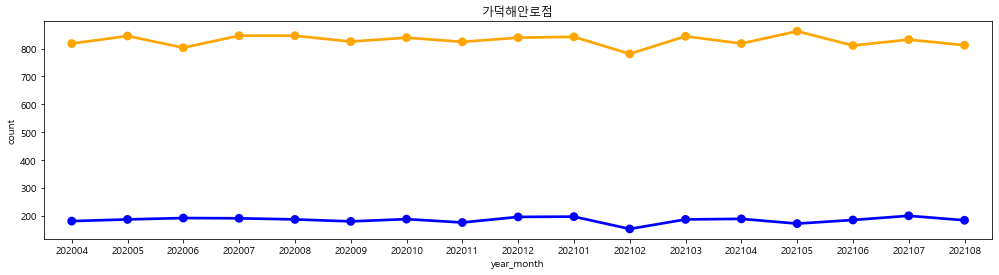

In [12]:
import seaborn as sns
from IPython.display import display, clear_output
from ipywidgets import Select, SelectMultiple
import matplotlib.pyplot as plt

# 한글 폰트 처리
import os

if os.name == 'nt':  # Windows
    plt.rc('font', family='Malgun Gothic')
elif os.name == 'posix':  # macOS
    plt.rc('font', family='AllieGothic')

store_list = store_monthly_data['store_name'].unique()


def make_graph_96(val):
    clear_output()
    display(select_96)

    fig = plt.figure(figsize=(17, 4))
    plt.subplots_adjust(wspace=0.25, hspace=0.6)

    for i, trg in enumerate(val['new']):
        pick_data = store_monthly_data.loc[
            store_monthly_data['store_name'] == trg]

        graph_fin = pick_data[[
            'store_name', 'order_fin', 'year_month']].copy()
        graph_fin.loc[:, 'type'] = 'fin'
        graph_fin = graph_fin.rename(columns={'order_fin': 'count'})

        graph_cancel = pick_data[[
            'store_name', 'order_cancel', 'year_month']].copy()
        graph_cancel.loc[:, 'type'] = 'cancel'
        graph_cancel = graph_cancel.rename(columns={'order_cancel': 'count'})

        ax = fig.add_subplot(1, len(val['new']), (i + 1))
        sns.pointplot(x="year_month", y="count", 
                      data=graph_fin, color='orange')
        sns.pointplot(x="year_month", y="count", 
                      data=graph_cancel, color='blue')
        ax.set_title(trg)


select_96 = SelectMultiple(options=store_list)
select_96.observe(make_graph_96, names='value')
display(select_96)

### 테크닉 97: 머신러닝 모델의 정밀도 평가 대시보드를 만들자

Select(options=('tree', 'RandomForest', 'GradientBoosting'), value='tree')

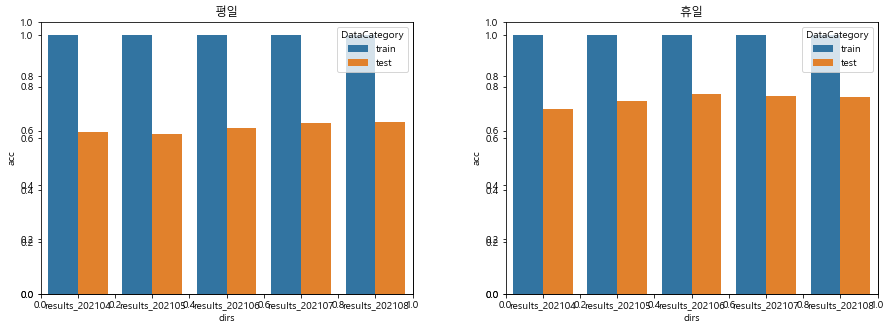

In [13]:
opt1 = ''


def s1_update_97(val):
    global opt1
    opt1 = val['new']
    graph_97()


def graph_97():
    clear_output()
    display(select1_97)

    graph_df_wd = score_all.loc[
        (score_all['model_name'] == opt1) & 
        (score_all['model_target'] == 'y_weekday')].copy()
    graph_df_we = score_all.loc[
        (score_all['model_name'] == opt1) & 
        (score_all['model_target'] == 'y_weekend')].copy()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    plt.subplots_adjust(wspace=0.25, hspace=0.6)
    ax1 = fig.add_subplot(1, 2, 1)
    sns.barplot(x='dirs', y='acc', data=graph_df_wd, hue='DataCategory')
    ax1.set_title('평일')

    ax2 = fig.add_subplot(1, 2, 2)
    sns.barplot(x='dirs', y='acc', data=graph_df_we, hue='DataCategory')
    ax2.set_title('휴일')


s1_option_97 = score_all['model_name'].unique()
select1_97 = Select(options=s1_option_97)
select1_97.observe(s1_update_97, names='value')
display(select1_97)

### 테크닉 98: 머신러닝 모델의 혼동 행렬 대시보드를 만들자

Select(options=('tree', 'RandomForest', 'GradientBoosting'), value='tree')

Select(options=('y_weekday', 'y_weekend'), value='y_weekday')

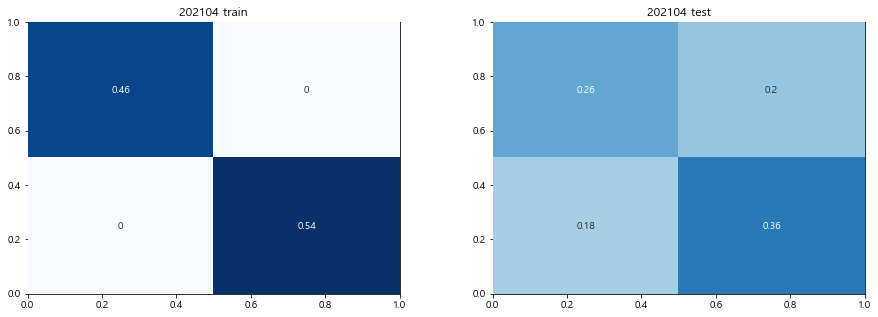

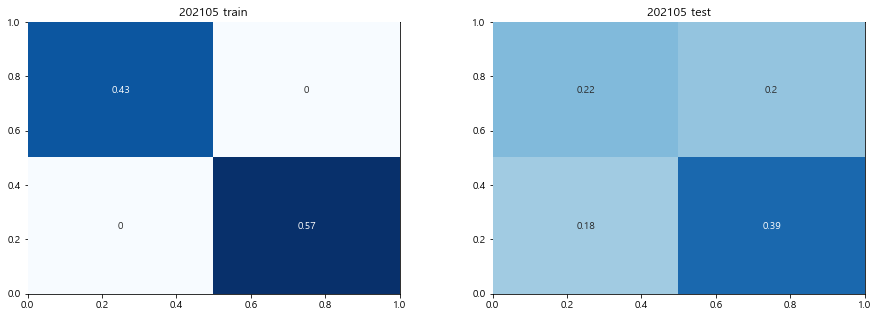

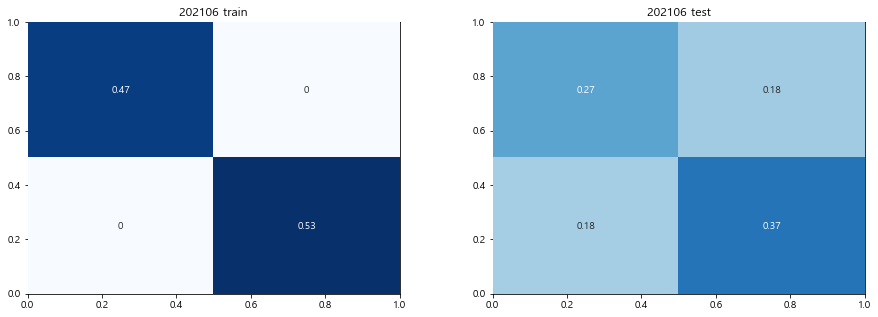

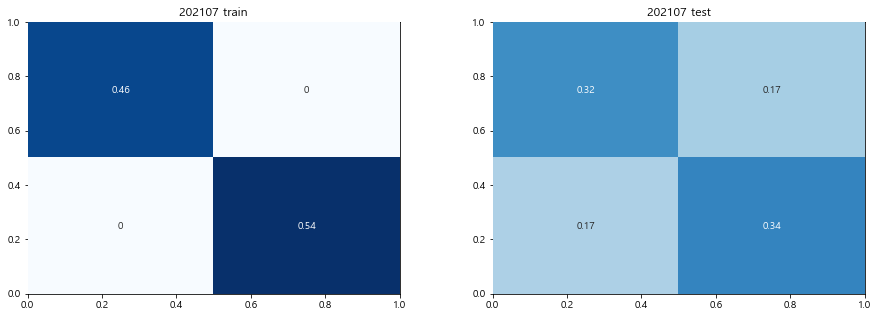

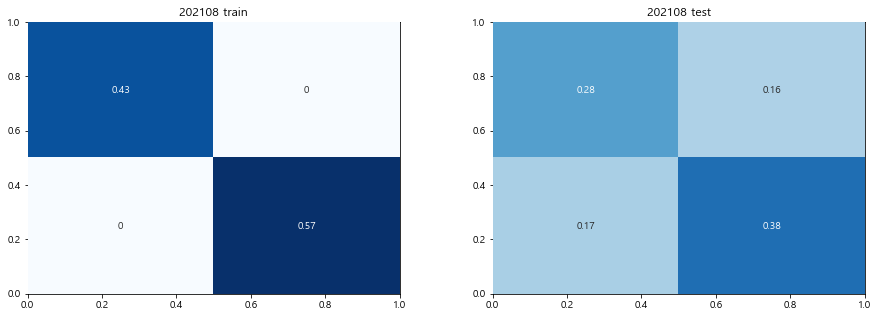

In [14]:
opt1 = ''
opt2 = ''


def s1_update_98(val):
    global opt1
    opt1 = val['new']
    graph_98()


def s2_update_98(val):
    global opt2
    opt2 = val['new']
    graph_98()


def graph_98():
    clear_output()
    display(select1_98, select2_98)

    for i, ym in enumerate(score_all['year_month'].unique()):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        plt.subplots_adjust(wspace=0.25, hspace=0.6)

        tmp = score_all.loc[(score_all['model_name'] == opt1) &
                            (score_all['model_target'] == opt2) &
                            (score_all['DataCategory'] == 'train') &
                            (score_all['year_month'] == ym)]
        if len(tmp) == 1:
            maxcnt = tmp["tp"].values[0] + tmp["fn"].values[0] + \
                     tmp["fp"].values[0] + tmp["tn"].values[0]
            cm = [[tmp['tp'].values[0] / maxcnt, tmp['fn'].values[0] / maxcnt],
                  [tmp['fp'].values[0] / maxcnt, tmp['tn'].values[0] / maxcnt]]
            ax1 = fig.add_subplot(1, 2, 1)
            sns.heatmap(cm, vmax=0.5, vmin=0, cmap='Blues', annot=True,
                        xticklabels=False, yticklabels=False, cbar=False)
            ax1.set_title(f'{ym} train')

        tmp = score_all.loc[(score_all['model_name'] == opt1) &
                            (score_all['model_target'] == opt2) &
                            (score_all['DataCategory'] == 'test') &
                            (score_all['year_month'] == ym)]
        if len(tmp) == 1:
            maxcnt = tmp["tp"].values[0] + tmp["fn"].values[0] + \
                     tmp["fp"].values[0] + tmp["tn"].values[0]
            cm = [[tmp['tp'].values[0] / maxcnt, tmp['fn'].values[0] / maxcnt],
                  [tmp['fp'].values[0] / maxcnt, tmp['tn'].values[0] / maxcnt]]
            ax2 = fig.add_subplot(1, 2, 2)
            sns.heatmap(cm, vmax=0.5, vmin=0, cmap='Blues', annot=True,
                        xticklabels=False, yticklabels=False, cbar=False)
            ax2.set_title(f'{ym} test')


s1_option_98 = score_all['model_name'].unique()
s2_option_98 = score_all['model_target'].unique()

select1_98 = Select(options=s1_option_98)
select1_98.observe(s1_update_98, names='value')

select2_98 = Select(options=s2_option_98)
select2_98.observe(s2_update_98, names='value')

display(select1_98, select2_98)

### 테크닉 99: 머신러닝 모델의 변수 중요도 분석 대시보드를 만들자

Select(options=('tree', 'RandomForest', 'GradientBoosting'), value='tree')

Select(options=('202104', '202105', '202106', '202107', '202108'), value='202104')

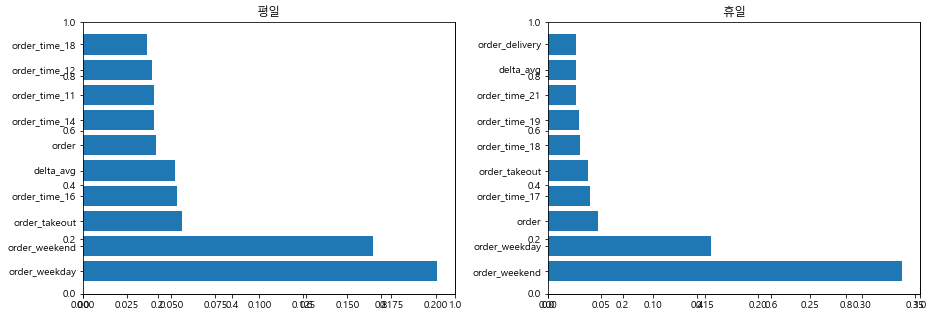

In [15]:
opt1 = ''
opt2 = ''


def s1_update(val):
    global opt1
    opt1 = val['new']
    if opt2 != '':
        graph_by_multi()


def s2_update(val):
    global opt2
    opt2 = val['new']
    if opt1 != '':
        graph_by_multi()


def graph_by_multi():
    clear_output()
    display(select1, select2)

    importance_tg_wd = importance_all.loc[
        (importance_all['model_name'] == opt1) &
        (importance_all['year_month'] == opt2) &
        (importance_all['model_target'] == 'y_weekday')].copy()

    importance_tg_we = importance_all.loc[
        (importance_all['model_name'] == opt1) &
        (importance_all['year_month'] == opt2) &
        (importance_all['model_target'] == 'y_weekend')].copy()

    importance_tg_wd.sort_values('importance', ascending=False, inplace=True)
    importance_tg_we.sort_values('importance', ascending=False, inplace=True)

    importance_tg_wd = importance_tg_wd.head(10)
    importance_tg_we = importance_tg_we.head(10)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    plt.subplots_adjust(wspace=0.25, hspace=0.6)
    ax1 = fig.add_subplot(1, 2, 1)
    plt.barh(importance_tg_wd['cols'], importance_tg_wd['importance'])
    ax1.set_title('평일')

    ax2 = fig.add_subplot(1, 2, 2)
    plt.barh(importance_tg_we['cols'], importance_tg_we['importance'])
    ax2.set_title('휴일')


s1_option = importance_all['model_name'].unique()
s2_option = importance_all['year_month'].unique()

select1 = Select(options=s1_option)
select1.observe(s1_update, names='value')

select2 = Select(options=s2_option)
select2.observe(s2_update, names='value')

display(select1, select2)

### 테크닉 100: 머신러닝 모델의 예측 결과를 시각화해서 검증하자

<AxesSubplot:xlabel='pred_year_month'>

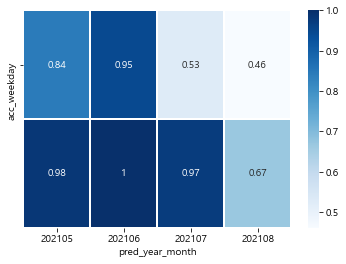

In [16]:
view_data = report_valid.copy()
view_data.loc[(view_data['score_weekday'] >= 0.5) & 
              (view_data['y_weekday'] == 1), 'correct_weekday'] = 1
view_data.loc[(view_data['score_weekday'] < 0.5) & 
              (view_data['y_weekday'] == 0), 'correct_weekday'] = 1
view_data.loc[(view_data['score_weekend'] >= 0.5) & 
              (view_data['y_weekend'] == 1), 'correct_weekend'] = 1
view_data.loc[(view_data['score_weekend'] < 0.5) & 
              (view_data['y_weekend'] == 0), 'correct_weekend'] = 1
view_data.loc[:, 'count'] = 1
view_data.fillna(0, inplace=True)
view_data = view_data.groupby('pred_year_month').sum()[
    ['correct_weekday', 'correct_weekend', 'count']]
view_data.loc[:, 'acc_weekday'] = \
    view_data['correct_weekday'] / view_data['count']
view_data.loc[:, 'acc_weekend'] = \
    view_data['correct_weekend'] / view_data['count']
view_data = view_data[['acc_weekday', 'acc_weekend']]

sns.heatmap(view_data.T, cmap='Blues', annot=True, 
            yticklabels=2, linewidths=.5)